In [102]:
#importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [103]:
## Loading the data
data=pd.read_excel("Flight_Fare.xlsx")
data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [104]:
data.shape

(10683, 11)

In [105]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [106]:
##Missing value detection
print("Missing values before imputation:")
print(data.isnull().sum())

Missing values before imputation:
Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64


In [107]:
#Finding the exact record of missing values
data[data['Route'].isna()| data['Total_Stops'].isna()]

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
9039,Air India,6/05/2019,Delhi,Cochin,NaN,09:45,09:25 07 May,23h 40m,NaN,No info,7480


In [108]:
## both missing values are in one row 
data.dropna(inplace=True)

In [109]:
data.isna().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

# Feature Engineering

In [110]:
data['Date_of_Journey']= pd.to_datetime(data['Date_of_Journey'])
data.head()

/var/folders/yy/690rwhcs4x79h0xj3sdj20yr0000gn/T/ipykernel_1244/1543958342.py:1: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  data['Date_of_Journey']= pd.to_datetime(data['Date_of_Journey'])


,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,2019-01-05,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,2019-09-06,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,2019-12-05,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,2019-01-03,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [111]:
data['Date_of_Journey'].dt.year.unique()

array([2019])

In [112]:
data['Journey_Day']= data['Date_of_Journey'].dt.day
data['Journey_Month']= data['Date_of_Journey'].dt.month
data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_Day,Journey_Month
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3
1,Air India,2019-01-05,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,5,1
2,Jet Airways,2019-09-06,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,6,9
3,IndiGo,2019-12-05,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,5,12
4,IndiGo,2019-01-03,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,3,1


In [113]:
##Dropping extra columns
data.drop(['Date_of_Journey'],axis=1, inplace = True)
data.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_Day,Journey_Month
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,5,1
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,6,9
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,5,12
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,3,1


In [114]:
##Converting to numerical format
data['Dep_Time']=pd.to_datetime(data['Dep_Time'])
data['Arrival_Time']=pd.to_datetime(data['Arrival_Time'])
data.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_Day,Journey_Month
0,IndiGo,Banglore,New Delhi,BLR → DEL,2024-02-20 22:20:00,2024-03-22 01:10:00,2h 50m,non-stop,No info,3897,24,3
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2024-02-20 05:50:00,2024-02-20 13:15:00,7h 25m,2 stops,No info,7662,5,1
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2024-02-20 09:25:00,2024-06-10 04:25:00,19h,2 stops,No info,13882,6,9
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,2024-02-20 18:05:00,2024-02-20 23:30:00,5h 25m,1 stop,No info,6218,5,12
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,2024-02-20 16:50:00,2024-02-20 21:35:00,4h 45m,1 stop,No info,13302,3,1


In [115]:
data['Dep_Time_hrs']= data['Dep_Time'].dt.hour
data['Dep_Time_mins']= data['Dep_Time'].dt.minute
data['Arrival_Time_hrs']= data['Arrival_Time'].dt.hour
data['Arrival_Time_mins']= data['Arrival_Time'].dt.minute
data.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_Day,Journey_Month,Dep_Time_hrs,Dep_Time_mins,Arrival_Time_hrs,Arrival_Time_mins
0,IndiGo,Banglore,New Delhi,BLR → DEL,2024-02-20 22:20:00,2024-03-22 01:10:00,2h 50m,non-stop,No info,3897,24,3,22,20,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2024-02-20 05:50:00,2024-02-20 13:15:00,7h 25m,2 stops,No info,7662,5,1,5,50,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2024-02-20 09:25:00,2024-06-10 04:25:00,19h,2 stops,No info,13882,6,9,9,25,4,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,2024-02-20 18:05:00,2024-02-20 23:30:00,5h 25m,1 stop,No info,6218,5,12,18,5,23,30
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,2024-02-20 16:50:00,2024-02-20 21:35:00,4h 45m,1 stop,No info,13302,3,1,16,50,21,35


In [116]:
##droping Dep_Time,Arrival_Time
data.drop(['Dep_Time','Arrival_Time'], axis=1, inplace = True)
data.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_Day,Journey_Month,Dep_Time_hrs,Dep_Time_mins,Arrival_Time_hrs,Arrival_Time_mins
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,22,20,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,5,1,5,50,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2 stops,No info,13882,6,9,9,25,4,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,5,12,18,5,23,30
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,3,1,16,50,21,35


In [117]:
data['Duration'].value_counts()

2h 50m     550
1h 30m     386
2h 45m     337
2h 55m     337
2h 35m     329
          ... 
31h 30m      1
30h 25m      1
42h 5m       1
4h 10m       1
47h 40m      1
Name: Duration, Length: 368, dtype: int64

In [118]:
## Handling with Duration

duration=list(data['Duration'])
for i in range(len(duration)):
    if len(duration[i].split())!=2:
        if 'h' in duration[i]:
            duration[i]=duration[i]+'0m'
        else:
            duration[i]='0h'+ duration[i]
duration

          


['2h 50m',
 '7h 25m',
 '19h0m',
 '5h 25m',
 '4h 45m',
 '2h 25m',
 '15h 30m',
 '21h 5m',
 '25h 30m',
 '7h 50m',
 '13h 15m',
 '2h 35m',
 '2h 15m',
 '12h 10m',
 '2h 35m',
 '26h 35m',
 '4h 30m',
 '22h 35m',
 '23h0m',
 '20h 35m',
 '5h 10m',
 '15h 20m',
 '2h 50m',
 '2h 55m',
 '13h 20m',
 '15h 10m',
 '5h 45m',
 '5h 55m',
 '2h 50m',
 '2h 15m',
 '2h 15m',
 '13h 25m',
 '2h 50m',
 '22h0m',
 '5h 30m',
 '10h 25m',
 '5h 15m',
 '2h 30m',
 '6h 15m',
 '11h 55m',
 '11h 5m',
 '8h 30m',
 '22h 5m',
 '2h 45m',
 '12h0m',
 '2h 50m',
 '2h 50m',
 '2h 15m',
 '16h 5m',
 '19h 55m',
 '3h 15m',
 '25h 20m',
 '2h 50m',
 '3h0m',
 '2h 50m',
 '16h 15m',
 '15h 5m',
 '2h 15m',
 '6h 30m',
 '25h 5m',
 '12h 25m',
 '27h 20m',
 '10h 15m',
 '10h 30m',
 '2h 15m',
 '10h 25m',
 '2h 50m',
 '1h 30m',
 '13h 20m',
 '2h 15m',
 '1h 25m',
 '26h 30m',
 '7h 20m',
 '13h 30m',
 '5h0m',
 '2h 45m',
 '2h 50m',
 '1h 30m',
 '19h 5m',
 '2h 15m',
 '14h 50m',
 '2h 40m',
 '22h 10m',
 '9h 35m',
 '10h0m',
 '21h 20m',
 '5h 25m',
 '18h 45m',
 '12h 20m',
 

In [119]:
duration_hr = []
duration_min = []

for i in range(len(duration)):
    # Splitting based on 'h' and 'm'
    hours, minutes = duration[i].split('h')
    
    # Extracting numerical values and converting to integers
    duration_hr.append(int(hours))
    
    # If there is 'm' after splitting by 'h', take the first part, otherwise, use 0
    duration_min.append(int(minutes.split('m')[0]) if 'm' in minutes else 0)





In [120]:
data['Duration_hr'] = duration_hr
data['Duration_min'] = duration_min


In [121]:
# Create a new column 'Total_Duration' by combining 'Duration_hr' and 'Duration_min'
data['Total_Duration'] = data['Duration_hr'] * 60 + data['Duration_min']

# Drop the individual 'Duration_hr' and 'Duration_min' columns if needed
data.drop(['Duration_hr', 'Duration_min'], axis=1, inplace=True)
data.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_Day,Journey_Month,Dep_Time_hrs,Dep_Time_mins,Arrival_Time_hrs,Arrival_Time_mins,Total_Duration
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,22,20,1,10,170
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,5,1,5,50,13,15,445
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2 stops,No info,13882,6,9,9,25,4,25,1140
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,5,12,18,5,23,30,325
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,3,1,16,50,21,35,285


In [122]:
data.drop('Duration', axis=1, inplace=True)
data.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,Journey_Day,Journey_Month,Dep_Time_hrs,Dep_Time_mins,Arrival_Time_hrs,Arrival_Time_mins,Total_Duration
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,No info,3897,24,3,22,20,1,10,170
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info,7662,5,1,5,50,13,15,445
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2 stops,No info,13882,6,9,9,25,4,25,1140
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1 stop,No info,6218,5,12,18,5,23,30,325
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,1 stop,No info,13302,3,1,16,50,21,35,285


In [123]:
data['Airline'].value_counts()

Jet Airways                          3849
IndiGo                               2053
Air India                            1751
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64

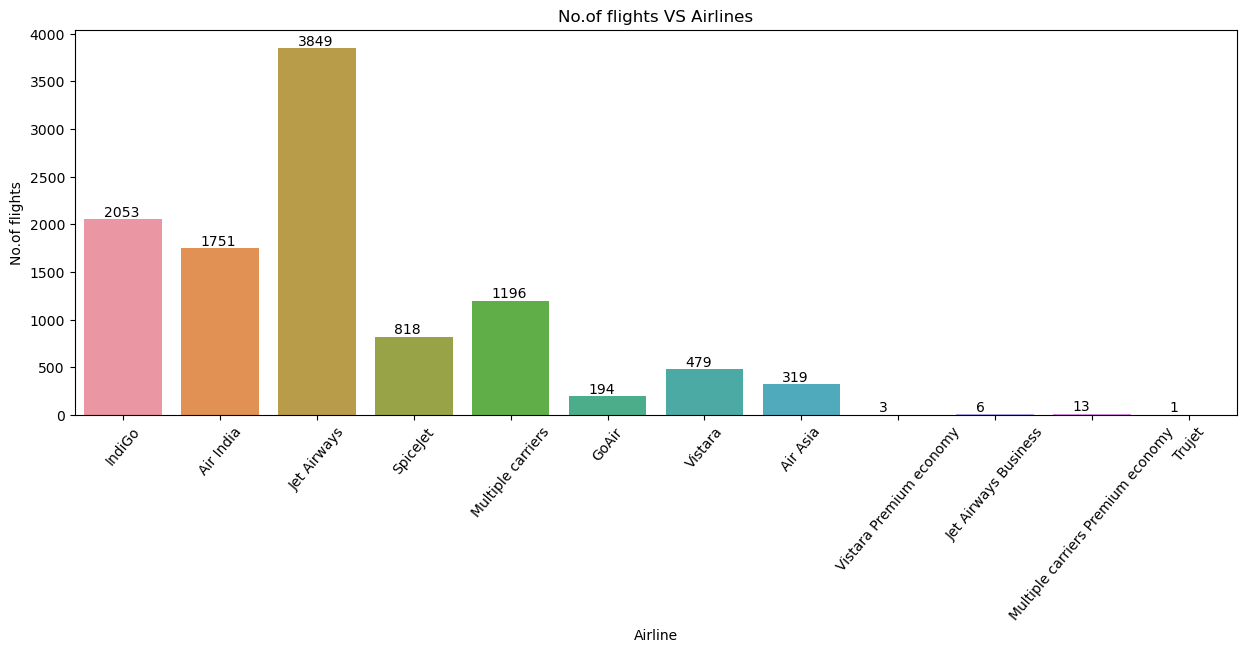

In [124]:
plt.figure(figsize=(15,5))
ax=sns.countplot(x=data['Airline'])
plt.title('No.of flights VS Airlines')
plt.xlabel('Airline')
plt.ylabel('No.of flights')
plt.xticks(rotation=50)
for i in ax.patches:
          ax.annotate(int(i.get_height()),(i.get_x()+0.2,i.get_y()+i.get_height()),va='bottom')

##Handeling categorical Data
1- Nominal Data (no order) use OneHotEncoder
2- Ordinal Data (there is order) use LableEncoder

In [125]:
##Performing one hot encoder to change object to numerical feature
Airline=pd.get_dummies(data['Airline'], drop_first=True)
Airline.head()

,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Trujet,Vistara,Vistara Premium economy
0,0,0,1,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0,0


In [126]:
##concatenate Airline with dataframe
data=pd.concat([data,Airline], axis=1)
data.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,Journey_Day,Journey_Month,Dep_Time_hrs,...,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Trujet,Vistara,Vistara Premium economy
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,No info,3897,24,3,22,...,0,1,0,0,0,0,0,0,0,0
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info,7662,5,1,5,...,0,0,0,0,0,0,0,0,0,0
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2 stops,No info,13882,6,9,9,...,0,0,1,0,0,0,0,0,0,0
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1 stop,No info,6218,5,12,18,...,0,1,0,0,0,0,0,0,0,0
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,1 stop,No info,13302,3,1,16,...,0,1,0,0,0,0,0,0,0,0


In [128]:
data.drop('Airline', axis=1, inplace=True)
data.head()

,Source,Destination,Route,Total_Stops,Additional_Info,Price,Journey_Day,Journey_Month,Dep_Time_hrs,Dep_Time_mins,...,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Trujet,Vistara,Vistara Premium economy
0,Banglore,New Delhi,BLR → DEL,non-stop,No info,3897,24,3,22,20,...,0,1,0,0,0,0,0,0,0,0
1,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info,7662,5,1,5,50,...,0,0,0,0,0,0,0,0,0,0
2,Delhi,Cochin,DEL → LKO → BOM → COK,2 stops,No info,13882,6,9,9,25,...,0,0,1,0,0,0,0,0,0,0
3,Kolkata,Banglore,CCU → NAG → BLR,1 stop,No info,6218,5,12,18,5,...,0,1,0,0,0,0,0,0,0,0
4,Banglore,New Delhi,BLR → NAG → DEL,1 stop,No info,13302,3,1,16,50,...,0,1,0,0,0,0,0,0,0,0


In [129]:
data['Source'].value_counts()

Delhi       4536
Kolkata     2871
Banglore    2197
Mumbai       697
Chennai      381
Name: Source, dtype: int64

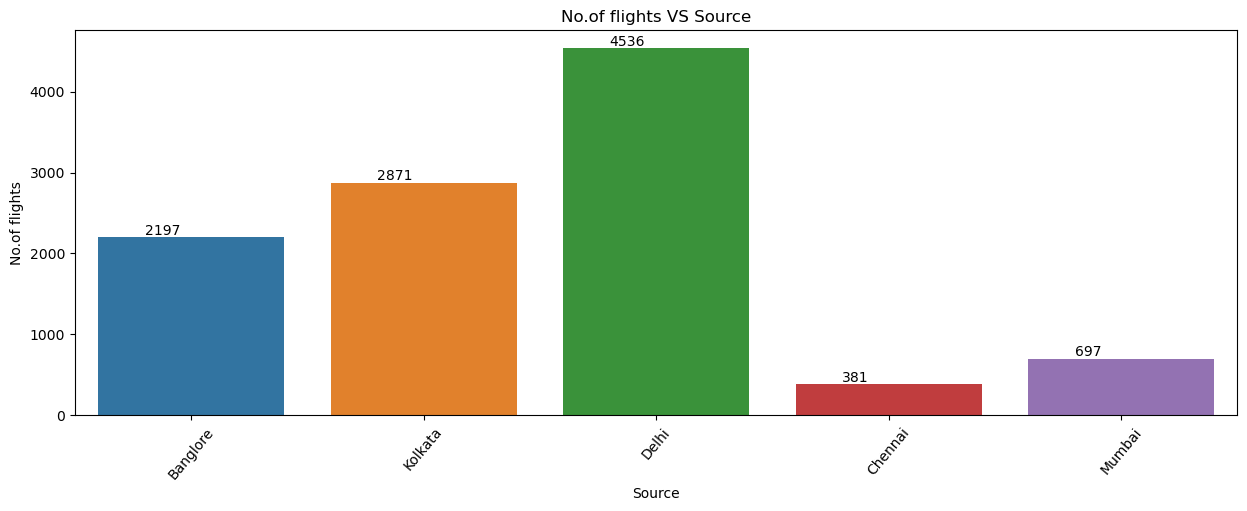

In [130]:
plt.figure(figsize=(15,5))
ax=sns.countplot(x=data['Source'])
plt.title('No.of flights VS Source')
plt.xlabel('Source')
plt.ylabel('No.of flights')
plt.xticks(rotation=50)
for i in ax.patches:
          ax.annotate(int(i.get_height()),(i.get_x()+0.2,i.get_y()+i.get_height()),va='bottom')

In [131]:
##performing one hot encoder to change object to numerical feature
Source=pd.get_dummies(data['Source'], drop_first=True, prefix='Source')
Source.head()

,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai
0,0,0,0,0
1,0,0,1,0
2,0,1,0,0
3,0,0,1,0
4,0,0,0,0


In [132]:
##concatenate Source with dataframe
data=pd.concat([data,Source], axis=1)
data.head()

,Source,Destination,Route,Total_Stops,Additional_Info,Price,Journey_Day,Journey_Month,Dep_Time_hrs,Dep_Time_mins,...,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Trujet,Vistara,Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai
0,Banglore,New Delhi,BLR → DEL,non-stop,No info,3897,24,3,22,20,...,0,0,0,0,0,0,0,0,0,0
1,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info,7662,5,1,5,50,...,0,0,0,0,0,0,0,0,1,0
2,Delhi,Cochin,DEL → LKO → BOM → COK,2 stops,No info,13882,6,9,9,25,...,0,0,0,0,0,0,0,1,0,0
3,Kolkata,Banglore,CCU → NAG → BLR,1 stop,No info,6218,5,12,18,5,...,0,0,0,0,0,0,0,0,1,0
4,Banglore,New Delhi,BLR → NAG → DEL,1 stop,No info,13302,3,1,16,50,...,0,0,0,0,0,0,0,0,0,0


In [133]:
data.drop('Source', axis=1, inplace=True)
data.head()

,Destination,Route,Total_Stops,Additional_Info,Price,Journey_Day,Journey_Month,Dep_Time_hrs,Dep_Time_mins,Arrival_Time_hrs,...,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Trujet,Vistara,Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai
0,New Delhi,BLR → DEL,non-stop,No info,3897,24,3,22,20,1,...,0,0,0,0,0,0,0,0,0,0
1,Banglore,CCU → IXR → BBI → BLR,2 stops,No info,7662,5,1,5,50,13,...,0,0,0,0,0,0,0,0,1,0
2,Cochin,DEL → LKO → BOM → COK,2 stops,No info,13882,6,9,9,25,4,...,0,0,0,0,0,0,0,1,0,0
3,Banglore,CCU → NAG → BLR,1 stop,No info,6218,5,12,18,5,23,...,0,0,0,0,0,0,0,0,1,0
4,New Delhi,BLR → NAG → DEL,1 stop,No info,13302,3,1,16,50,21,...,0,0,0,0,0,0,0,0,0,0


In [134]:
data['Destination'].value_counts()

Cochin       4536
Banglore     2871
Delhi        1265
New Delhi     932
Hyderabad     697
Kolkata       381
Name: Destination, dtype: int64

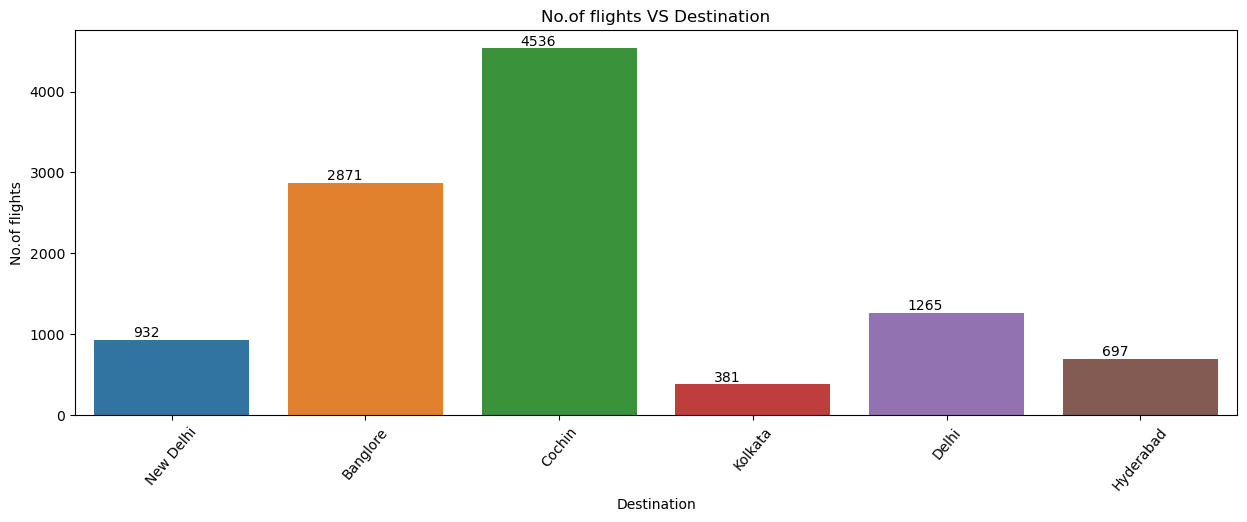

In [135]:
plt.figure(figsize=(15,5))
ax=sns.countplot(x=data['Destination'])
plt.title('No.of flights VS Destination')
plt.xlabel('Destination')
plt.ylabel('No.of flights')
plt.xticks(rotation=50)
for i in ax.patches:
          ax.annotate(int(i.get_height()),(i.get_x()+0.2,i.get_y()+i.get_height()),va='bottom')

In [136]:
##performing one hot encoder to change object to numerical feature
Destination=pd.get_dummies(data['Destination'], drop_first=True, prefix='Dest')
Destination.head()

,Dest_Cochin,Dest_Delhi,Dest_Hyderabad,Dest_Kolkata,Dest_New Delhi
0,0,0,0,0,1
1,0,0,0,0,0
2,1,0,0,0,0
3,0,0,0,0,0
4,0,0,0,0,1


In [137]:
##concatenate Destination with dataframe
data=pd.concat([data,Destination], axis=1)
data.head()

,Destination,Route,Total_Stops,Additional_Info,Price,Journey_Day,Journey_Month,Dep_Time_hrs,Dep_Time_mins,Arrival_Time_hrs,...,Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Dest_Cochin,Dest_Delhi,Dest_Hyderabad,Dest_Kolkata,Dest_New Delhi
0,New Delhi,BLR → DEL,non-stop,No info,3897,24,3,22,20,1,...,0,0,0,0,0,0,0,0,0,1
1,Banglore,CCU → IXR → BBI → BLR,2 stops,No info,7662,5,1,5,50,13,...,0,0,0,1,0,0,0,0,0,0
2,Cochin,DEL → LKO → BOM → COK,2 stops,No info,13882,6,9,9,25,4,...,0,0,1,0,0,1,0,0,0,0
3,Banglore,CCU → NAG → BLR,1 stop,No info,6218,5,12,18,5,23,...,0,0,0,1,0,0,0,0,0,0
4,New Delhi,BLR → NAG → DEL,1 stop,No info,13302,3,1,16,50,21,...,0,0,0,0,0,0,0,0,0,1


In [138]:
data.drop('Destination', axis=1, inplace=True)
data.head()

,Route,Total_Stops,Additional_Info,Price,Journey_Day,Journey_Month,Dep_Time_hrs,Dep_Time_mins,Arrival_Time_hrs,Arrival_Time_mins,...,Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Dest_Cochin,Dest_Delhi,Dest_Hyderabad,Dest_Kolkata,Dest_New Delhi
0,BLR → DEL,non-stop,No info,3897,24,3,22,20,1,10,...,0,0,0,0,0,0,0,0,0,1
1,CCU → IXR → BBI → BLR,2 stops,No info,7662,5,1,5,50,13,15,...,0,0,0,1,0,0,0,0,0,0
2,DEL → LKO → BOM → COK,2 stops,No info,13882,6,9,9,25,4,25,...,0,0,1,0,0,1,0,0,0,0
3,CCU → NAG → BLR,1 stop,No info,6218,5,12,18,5,23,30,...,0,0,0,1,0,0,0,0,0,0
4,BLR → NAG → DEL,1 stop,No info,13302,3,1,16,50,21,35,...,0,0,0,0,0,0,0,0,0,1


In [139]:
data.drop('Additional_Info',axis=1, inplace=True)
data.head()

,Route,Total_Stops,Price,Journey_Day,Journey_Month,Dep_Time_hrs,Dep_Time_mins,Arrival_Time_hrs,Arrival_Time_mins,Total_Duration,...,Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Dest_Cochin,Dest_Delhi,Dest_Hyderabad,Dest_Kolkata,Dest_New Delhi
0,BLR → DEL,non-stop,3897,24,3,22,20,1,10,170,...,0,0,0,0,0,0,0,0,0,1
1,CCU → IXR → BBI → BLR,2 stops,7662,5,1,5,50,13,15,445,...,0,0,0,1,0,0,0,0,0,0
2,DEL → LKO → BOM → COK,2 stops,13882,6,9,9,25,4,25,1140,...,0,0,1,0,0,1,0,0,0,0
3,CCU → NAG → BLR,1 stop,6218,5,12,18,5,23,30,325,...,0,0,0,1,0,0,0,0,0,0
4,BLR → NAG → DEL,1 stop,13302,3,1,16,50,21,35,285,...,0,0,0,0,0,0,0,0,0,1


In [140]:
data['Route'].value_counts()

DEL → BOM → COK          2376
BLR → DEL                1552
CCU → BOM → BLR           979
CCU → BLR                 724
BOM → HYD                 621
                         ... 
CCU → VTZ → BLR             1
CCU → IXZ → MAA → BLR       1
BOM → COK → MAA → HYD       1
BOM → CCU → HYD             1
BOM → BBI → HYD             1
Name: Route, Length: 128, dtype: int64

In [142]:
##Route
route=data[['Route']]
route.head()

,Route
0,BLR → DEL
1,CCU → IXR → BBI → BLR
2,DEL → LKO → BOM → COK
3,CCU → NAG → BLR
4,BLR → NAG → DEL


In [143]:
route['Route_1']=route['Route'].str.split('→ ').str[0]
route['Route_2']=route['Route'].str.split('→ ').str[1]
route['Route_3']=route['Route'].str.split('→ ').str[2]
route['Route_4']=route['Route'].str.split('→ ').str[3]
route['Route_5']=route['Route'].str.split('→ ').str[4]
route.head()

/var/folders/yy/690rwhcs4x79h0xj3sdj20yr0000gn/T/ipykernel_1244/1152165220.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  route['Route_1']=route['Route'].str.split('→ ').str[0]
/var/folders/yy/690rwhcs4x79h0xj3sdj20yr0000gn/T/ipykernel_1244/1152165220.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  route['Route_2']=route['Route'].str.split('→ ').str[1]
/var/folders/yy/690rwhcs4x79h0xj3sdj20yr0000gn/T/ipykernel_1244/1152165220.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a

,Route,Route_1,Route_2,Route_3,Route_4,Route_5
0,BLR → DEL,BLR,DEL,NaN,NaN,NaN
1,CCU → IXR → BBI → BLR,CCU,IXR,BBI,BLR,NaN
2,DEL → LKO → BOM → COK,DEL,LKO,BOM,COK,NaN
3,CCU → NAG → BLR,CCU,NAG,BLR,NaN,NaN
4,BLR → NAG → DEL,BLR,NAG,DEL,NaN,NaN


In [144]:
route.fillna('None', inplace=True)
route.head()

/var/folders/yy/690rwhcs4x79h0xj3sdj20yr0000gn/T/ipykernel_1244/3799054722.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  route.fillna('None', inplace=True)


,Route,Route_1,Route_2,Route_3,Route_4,Route_5
0,BLR → DEL,BLR,DEL,None,None,None
1,CCU → IXR → BBI → BLR,CCU,IXR,BBI,BLR,None
2,DEL → LKO → BOM → COK,DEL,LKO,BOM,COK,None
3,CCU → NAG → BLR,CCU,NAG,BLR,None,None
4,BLR → NAG → DEL,BLR,NAG,DEL,None,None


In [145]:
none_counts = route[['Route_1', 'Route_2', 'Route_3', 'Route_4', 'Route_5']].apply(lambda x: x.value_counts().get('None', 0))
print(none_counts)


Route_1        0
Route_2        0
Route_3     3491
Route_4     9116
Route_5    10636
dtype: int64


## We decide to drop Route becoz it is included lots of None values

In [146]:
data.drop('Route',axis=1, inplace=True)
data.head()

,Total_Stops,Price,Journey_Day,Journey_Month,Dep_Time_hrs,Dep_Time_mins,Arrival_Time_hrs,Arrival_Time_mins,Total_Duration,Air India,...,Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Dest_Cochin,Dest_Delhi,Dest_Hyderabad,Dest_Kolkata,Dest_New Delhi
0,non-stop,3897,24,3,22,20,1,10,170,0,...,0,0,0,0,0,0,0,0,0,1
1,2 stops,7662,5,1,5,50,13,15,445,1,...,0,0,0,1,0,0,0,0,0,0
2,2 stops,13882,6,9,9,25,4,25,1140,0,...,0,0,1,0,0,1,0,0,0,0
3,1 stop,6218,5,12,18,5,23,30,325,0,...,0,0,0,1,0,0,0,0,0,0
4,1 stop,13302,3,1,16,50,21,35,285,0,...,0,0,0,0,0,0,0,0,0,1


In [147]:
data['Total_Stops'].value_counts()

1 stop      5625
non-stop    3491
2 stops     1520
3 stops       45
4 stops        1
Name: Total_Stops, dtype: int64

In [148]:
data.replace({'non-stop':0, '1 stop':1,'2 stops':2,'3 stops':3,'4 stops':4}, inplace=True)
data.head()

,Total_Stops,Price,Journey_Day,Journey_Month,Dep_Time_hrs,Dep_Time_mins,Arrival_Time_hrs,Arrival_Time_mins,Total_Duration,Air India,...,Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Dest_Cochin,Dest_Delhi,Dest_Hyderabad,Dest_Kolkata,Dest_New Delhi
0,0,3897,24,3,22,20,1,10,170,0,...,0,0,0,0,0,0,0,0,0,1
1,2,7662,5,1,5,50,13,15,445,1,...,0,0,0,1,0,0,0,0,0,0
2,2,13882,6,9,9,25,4,25,1140,0,...,0,0,1,0,0,1,0,0,0,0
3,1,6218,5,12,18,5,23,30,325,0,...,0,0,0,1,0,0,0,0,0,0
4,1,13302,3,1,16,50,21,35,285,0,...,0,0,0,0,0,0,0,0,0,1


In [149]:
data.dtypes

Total_Stops                          int64
Price                                int64
Journey_Day                          int64
Journey_Month                        int64
Dep_Time_hrs                         int64
Dep_Time_mins                        int64
Arrival_Time_hrs                     int64
Arrival_Time_mins                    int64
Total_Duration                       int64
Air India                            uint8
GoAir                                uint8
IndiGo                               uint8
Jet Airways                          uint8
Jet Airways Business                 uint8
Multiple carriers                    uint8
Multiple carriers Premium economy    uint8
SpiceJet                             uint8
Trujet                               uint8
Vistara                              uint8
Vistara Premium economy              uint8
Source_Chennai                       uint8
Source_Delhi                         uint8
Source_Kolkata                       uint8
Source_Mumb

In [150]:
## Detecting outliers

import numpy as np
from scipy import stats

# Set a threshold for identifying outliers 
threshold = 3

# Create a dictionary to store the number of outliers for each column
outliers_count = {}

# Iterate through each numeric column
for col in data.select_dtypes(include=['number']).columns:
    # Calculate z-scores
    z_scores = stats.zscore(data[col])
    
    # Find indices of outliers
    outlier_indices = (np.abs(z_scores) > threshold)
    
    # Count the number of outliers
    outliers_count[col] = np.sum(outlier_indices)

# Print the number of outliers for each column
for col, count in outliers_count.items():
    print(f"Number of outliers in '{col}': {count}")


Number of outliers in 'Total_Stops': 46
Number of outliers in 'Price': 96
Number of outliers in 'Journey_Day': 0
Number of outliers in 'Journey_Month': 0
Number of outliers in 'Dep_Time_hrs': 0
Number of outliers in 'Dep_Time_mins': 0
Number of outliers in 'Arrival_Time_hrs': 0
Number of outliers in 'Arrival_Time_mins': 0
Number of outliers in 'Total_Duration': 66
Number of outliers in 'Air India': 0
Number of outliers in 'GoAir': 194
Number of outliers in 'IndiGo': 0
Number of outliers in 'Jet Airways': 0
Number of outliers in 'Jet Airways Business': 6
Number of outliers in 'Multiple carriers': 0
Number of outliers in 'Multiple carriers Premium economy': 13
Number of outliers in 'SpiceJet': 818
Number of outliers in 'Trujet': 1
Number of outliers in 'Vistara': 479
Number of outliers in 'Vistara Premium economy': 3
Number of outliers in 'Source_Chennai': 381
Number of outliers in 'Source_Delhi': 0
Number of outliers in 'Source_Kolkata': 0
Number of outliers in 'Source_Mumbai': 697
Numb

In [ ]:
## we decided to get some insight about outliers in case we wanted to drop them know how 

In [151]:
# Save the cleaned DataFrame to a CSV file
data.to_csv('clean_data.csv', index=False)
df=pd.read_csv('clean_data.csv')
df.head()

,Total_Stops,Price,Journey_Day,Journey_Month,Dep_Time_hrs,Dep_Time_mins,Arrival_Time_hrs,Arrival_Time_mins,Total_Duration,Air India,...,Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Dest_Cochin,Dest_Delhi,Dest_Hyderabad,Dest_Kolkata,Dest_New Delhi
0,0,3897,24,3,22,20,1,10,170,0,...,0,0,0,0,0,0,0,0,0,1
1,2,7662,5,1,5,50,13,15,445,1,...,0,0,0,1,0,0,0,0,0,0
2,2,13882,6,9,9,25,4,25,1140,0,...,0,0,1,0,0,1,0,0,0,0
3,1,6218,5,12,18,5,23,30,325,0,...,0,0,0,1,0,0,0,0,0,0
4,1,13302,3,1,16,50,21,35,285,0,...,0,0,0,0,0,0,0,0,0,1


In [152]:
#Dropping Price from df
price_col = df['Price']
df_without_price = df.drop('Price', axis=1)
df_without_price.head()

,Total_Stops,Journey_Day,Journey_Month,Dep_Time_hrs,Dep_Time_mins,Arrival_Time_hrs,Arrival_Time_mins,Total_Duration,Air India,GoAir,...,Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Dest_Cochin,Dest_Delhi,Dest_Hyderabad,Dest_Kolkata,Dest_New Delhi
0,0,24,3,22,20,1,10,170,0,0,...,0,0,0,0,0,0,0,0,0,1
1,2,5,1,5,50,13,15,445,1,0,...,0,0,0,1,0,0,0,0,0,0
2,2,6,9,9,25,4,25,1140,0,0,...,0,0,1,0,0,1,0,0,0,0
3,1,5,12,18,5,23,30,325,0,0,...,0,0,0,1,0,0,0,0,0,0
4,1,3,1,16,50,21,35,285,0,0,...,0,0,0,0,0,0,0,0,0,1


In [153]:
# Save the DataFrame without 'Price' to a new CSV file
df_without_price.to_csv('df_without_price.csv', index=False)

In [154]:
# Append the 'Price' column to the DataFrame without 'Price'
df_final = pd.concat([df_without_price, price_col], axis=1)

# Save the final DataFrame with 'Price' at the end to a new CSV file
df_final.to_csv('df_final.csv', index=False)

# Display the first few rows of the final DataFrame
df_final.head()

,Total_Stops,Journey_Day,Journey_Month,Dep_Time_hrs,Dep_Time_mins,Arrival_Time_hrs,Arrival_Time_mins,Total_Duration,Air India,GoAir,...,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Dest_Cochin,Dest_Delhi,Dest_Hyderabad,Dest_Kolkata,Dest_New Delhi,Price
0,0,24,3,22,20,1,10,170,0,0,...,0,0,0,0,0,0,0,0,1,3897
1,2,5,1,5,50,13,15,445,1,0,...,0,0,1,0,0,0,0,0,0,7662
2,2,6,9,9,25,4,25,1140,0,0,...,0,1,0,0,1,0,0,0,0,13882
3,1,5,12,18,5,23,30,325,0,0,...,0,0,1,0,0,0,0,0,0,6218
4,1,3,1,16,50,21,35,285,0,0,...,0,0,0,0,0,0,0,0,1,13302


## Feature Selection

In [155]:
X = df_final.drop(columns=['Price'])
X.head()

,Total_Stops,Journey_Day,Journey_Month,Dep_Time_hrs,Dep_Time_mins,Arrival_Time_hrs,Arrival_Time_mins,Total_Duration,Air India,GoAir,...,Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Dest_Cochin,Dest_Delhi,Dest_Hyderabad,Dest_Kolkata,Dest_New Delhi
0,0,24,3,22,20,1,10,170,0,0,...,0,0,0,0,0,0,0,0,0,1
1,2,5,1,5,50,13,15,445,1,0,...,0,0,0,1,0,0,0,0,0,0
2,2,6,9,9,25,4,25,1140,0,0,...,0,0,1,0,0,1,0,0,0,0
3,1,5,12,18,5,23,30,325,0,0,...,0,0,0,1,0,0,0,0,0,0
4,1,3,1,16,50,21,35,285,0,0,...,0,0,0,0,0,0,0,0,0,1


In [156]:
y = df_final['Price']
y.head()

0     3897
1     7662
2    13882
3     6218
4    13302
Name: Price, dtype: int64

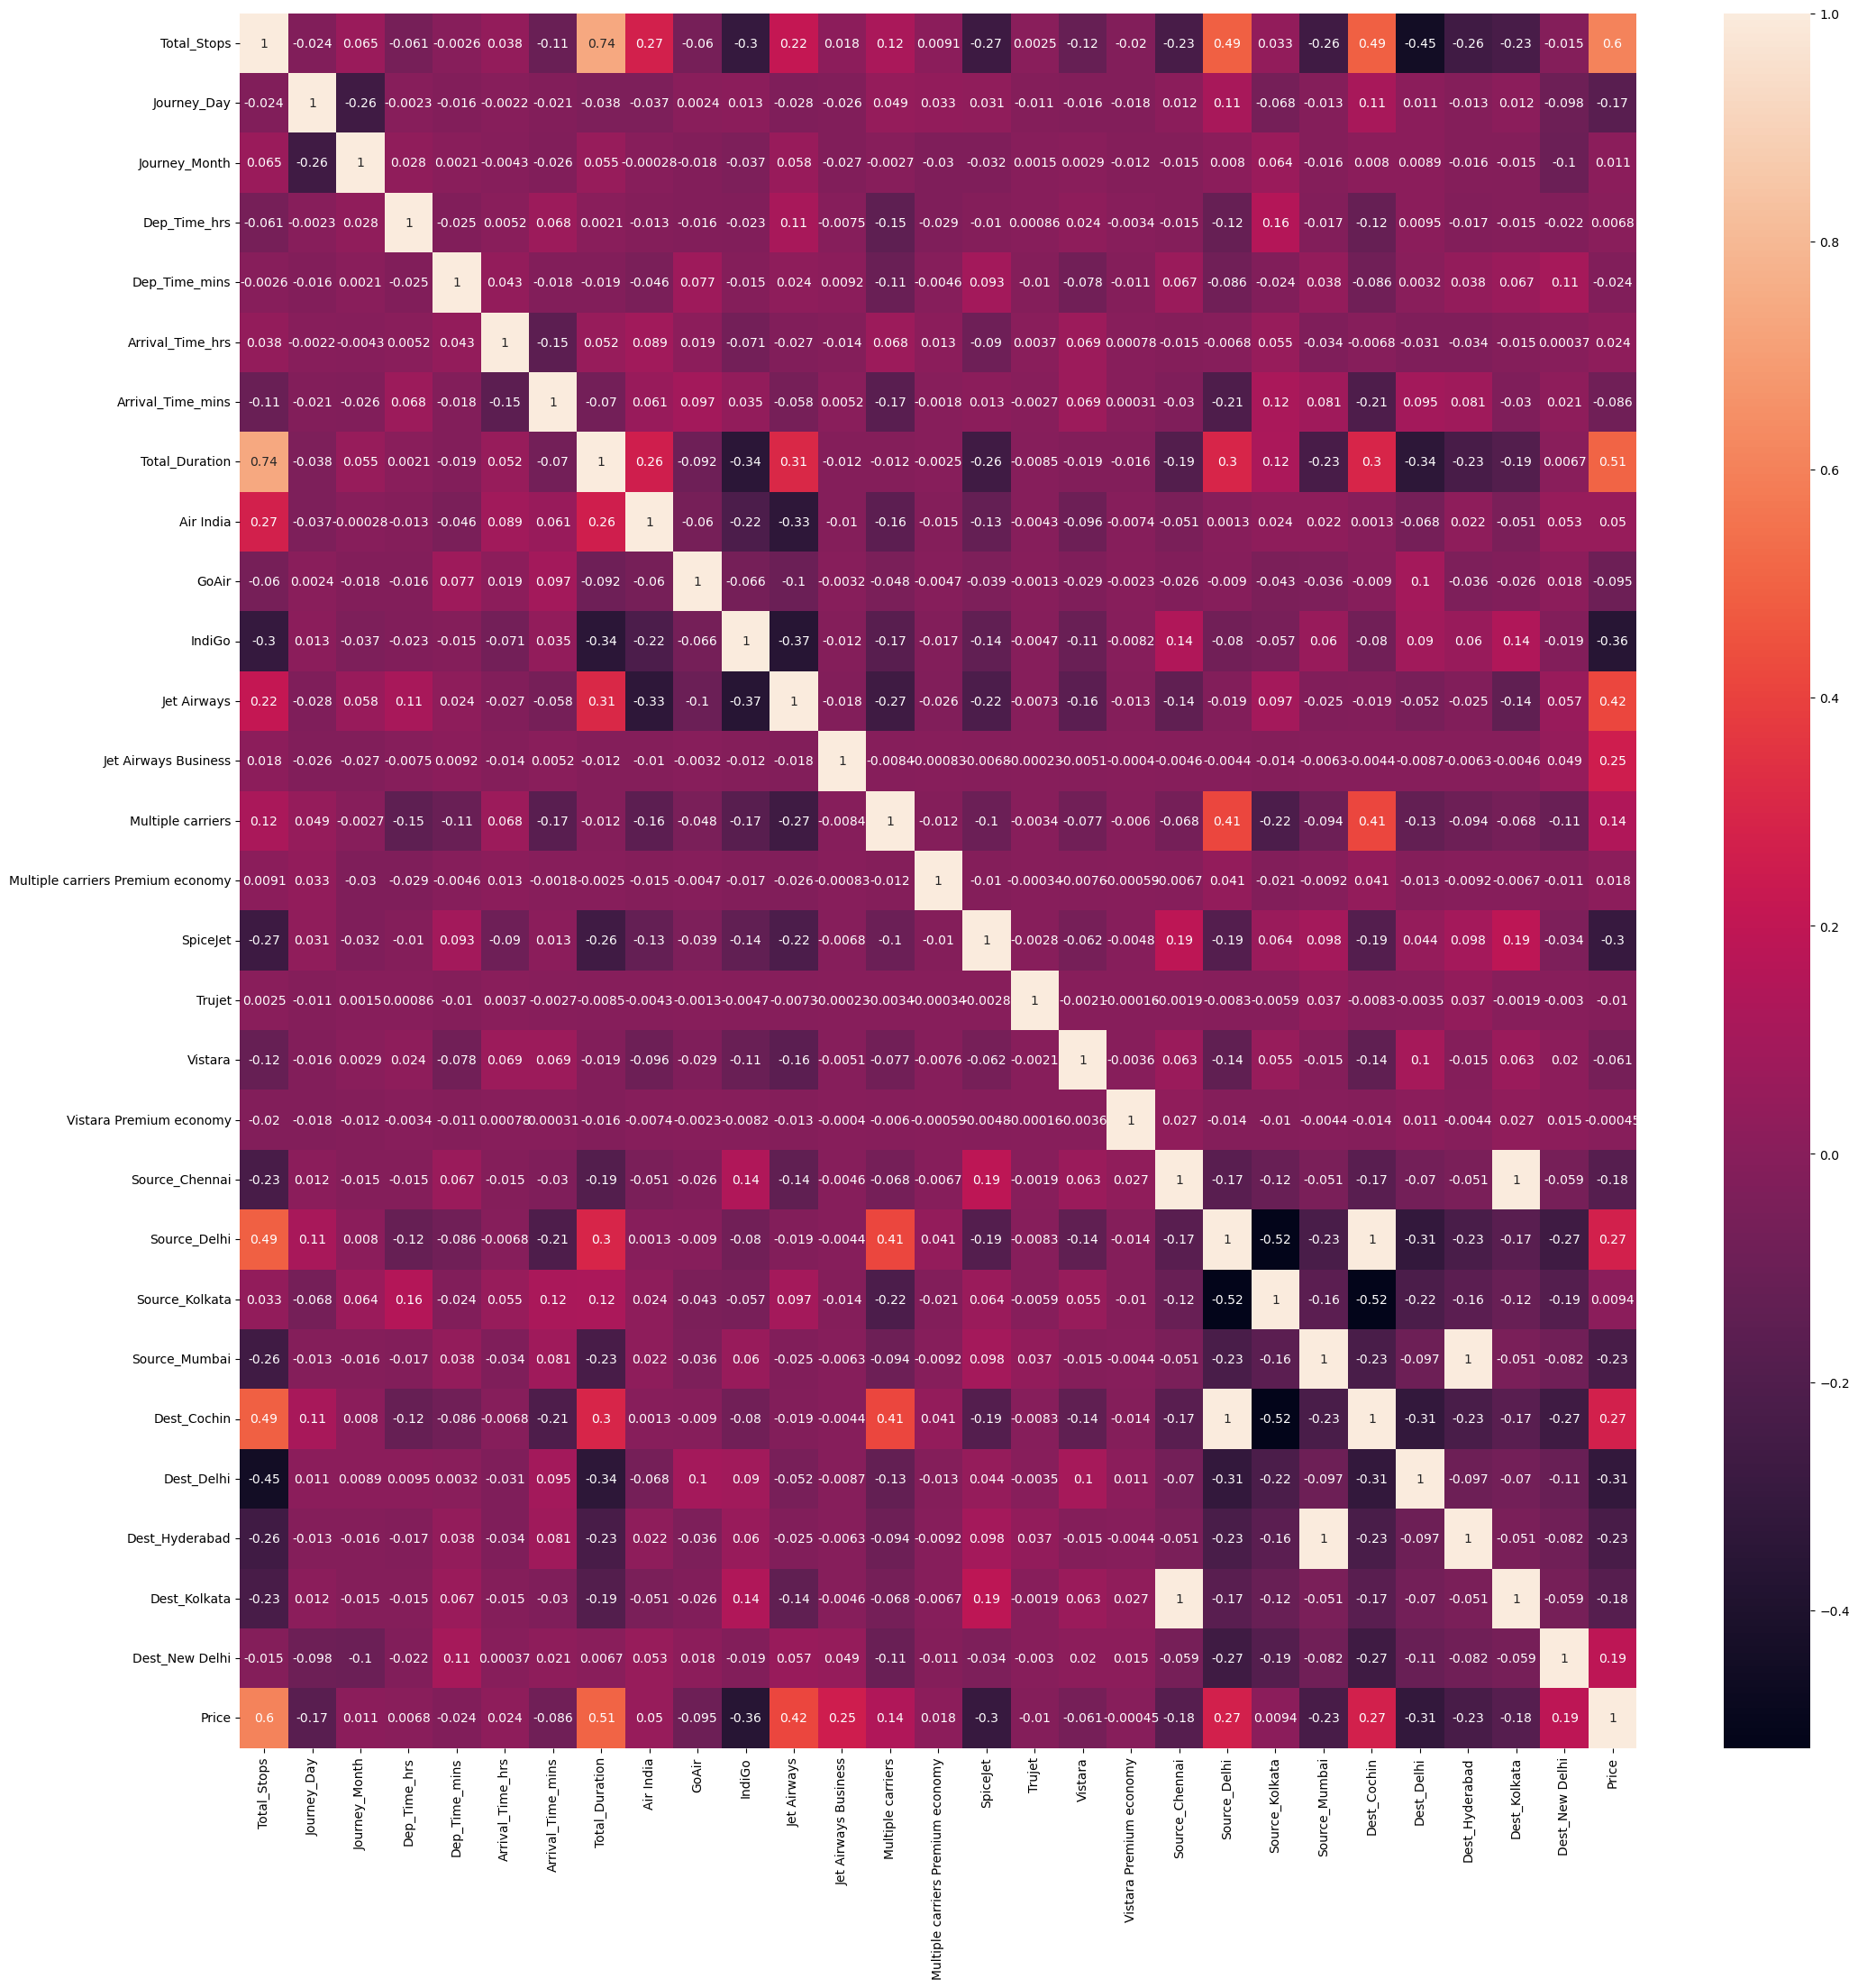

In [157]:
plt.figure(figsize=(25,25))
sns.heatmap(df_final.corr(),annot=True)

plt.show()

In [ ]:
###### The following have positive corr
Source_Chennai & Destination_Kolkate are positively correlated
Source_Delhi & Destination_Cochin are positively correlated
Source_Mumbai & Destination Hydarabad positively correlated

In [158]:
correlation_matrix = df_final.corr()

# Identify highly correlated features
highly_correlated = set()
for i in range(len(correlation_matrix.columns)):
    for j in range(i):
        if abs(correlation_matrix.iloc[i, j]) > 0.8:  
            colname = correlation_matrix.columns[i]
            highly_correlated.add(colname)

# Drop highly correlated features
df_new = df_final.drop(columns=highly_correlated)
new_corr_matrix = df_new.corr()

<Axes: >

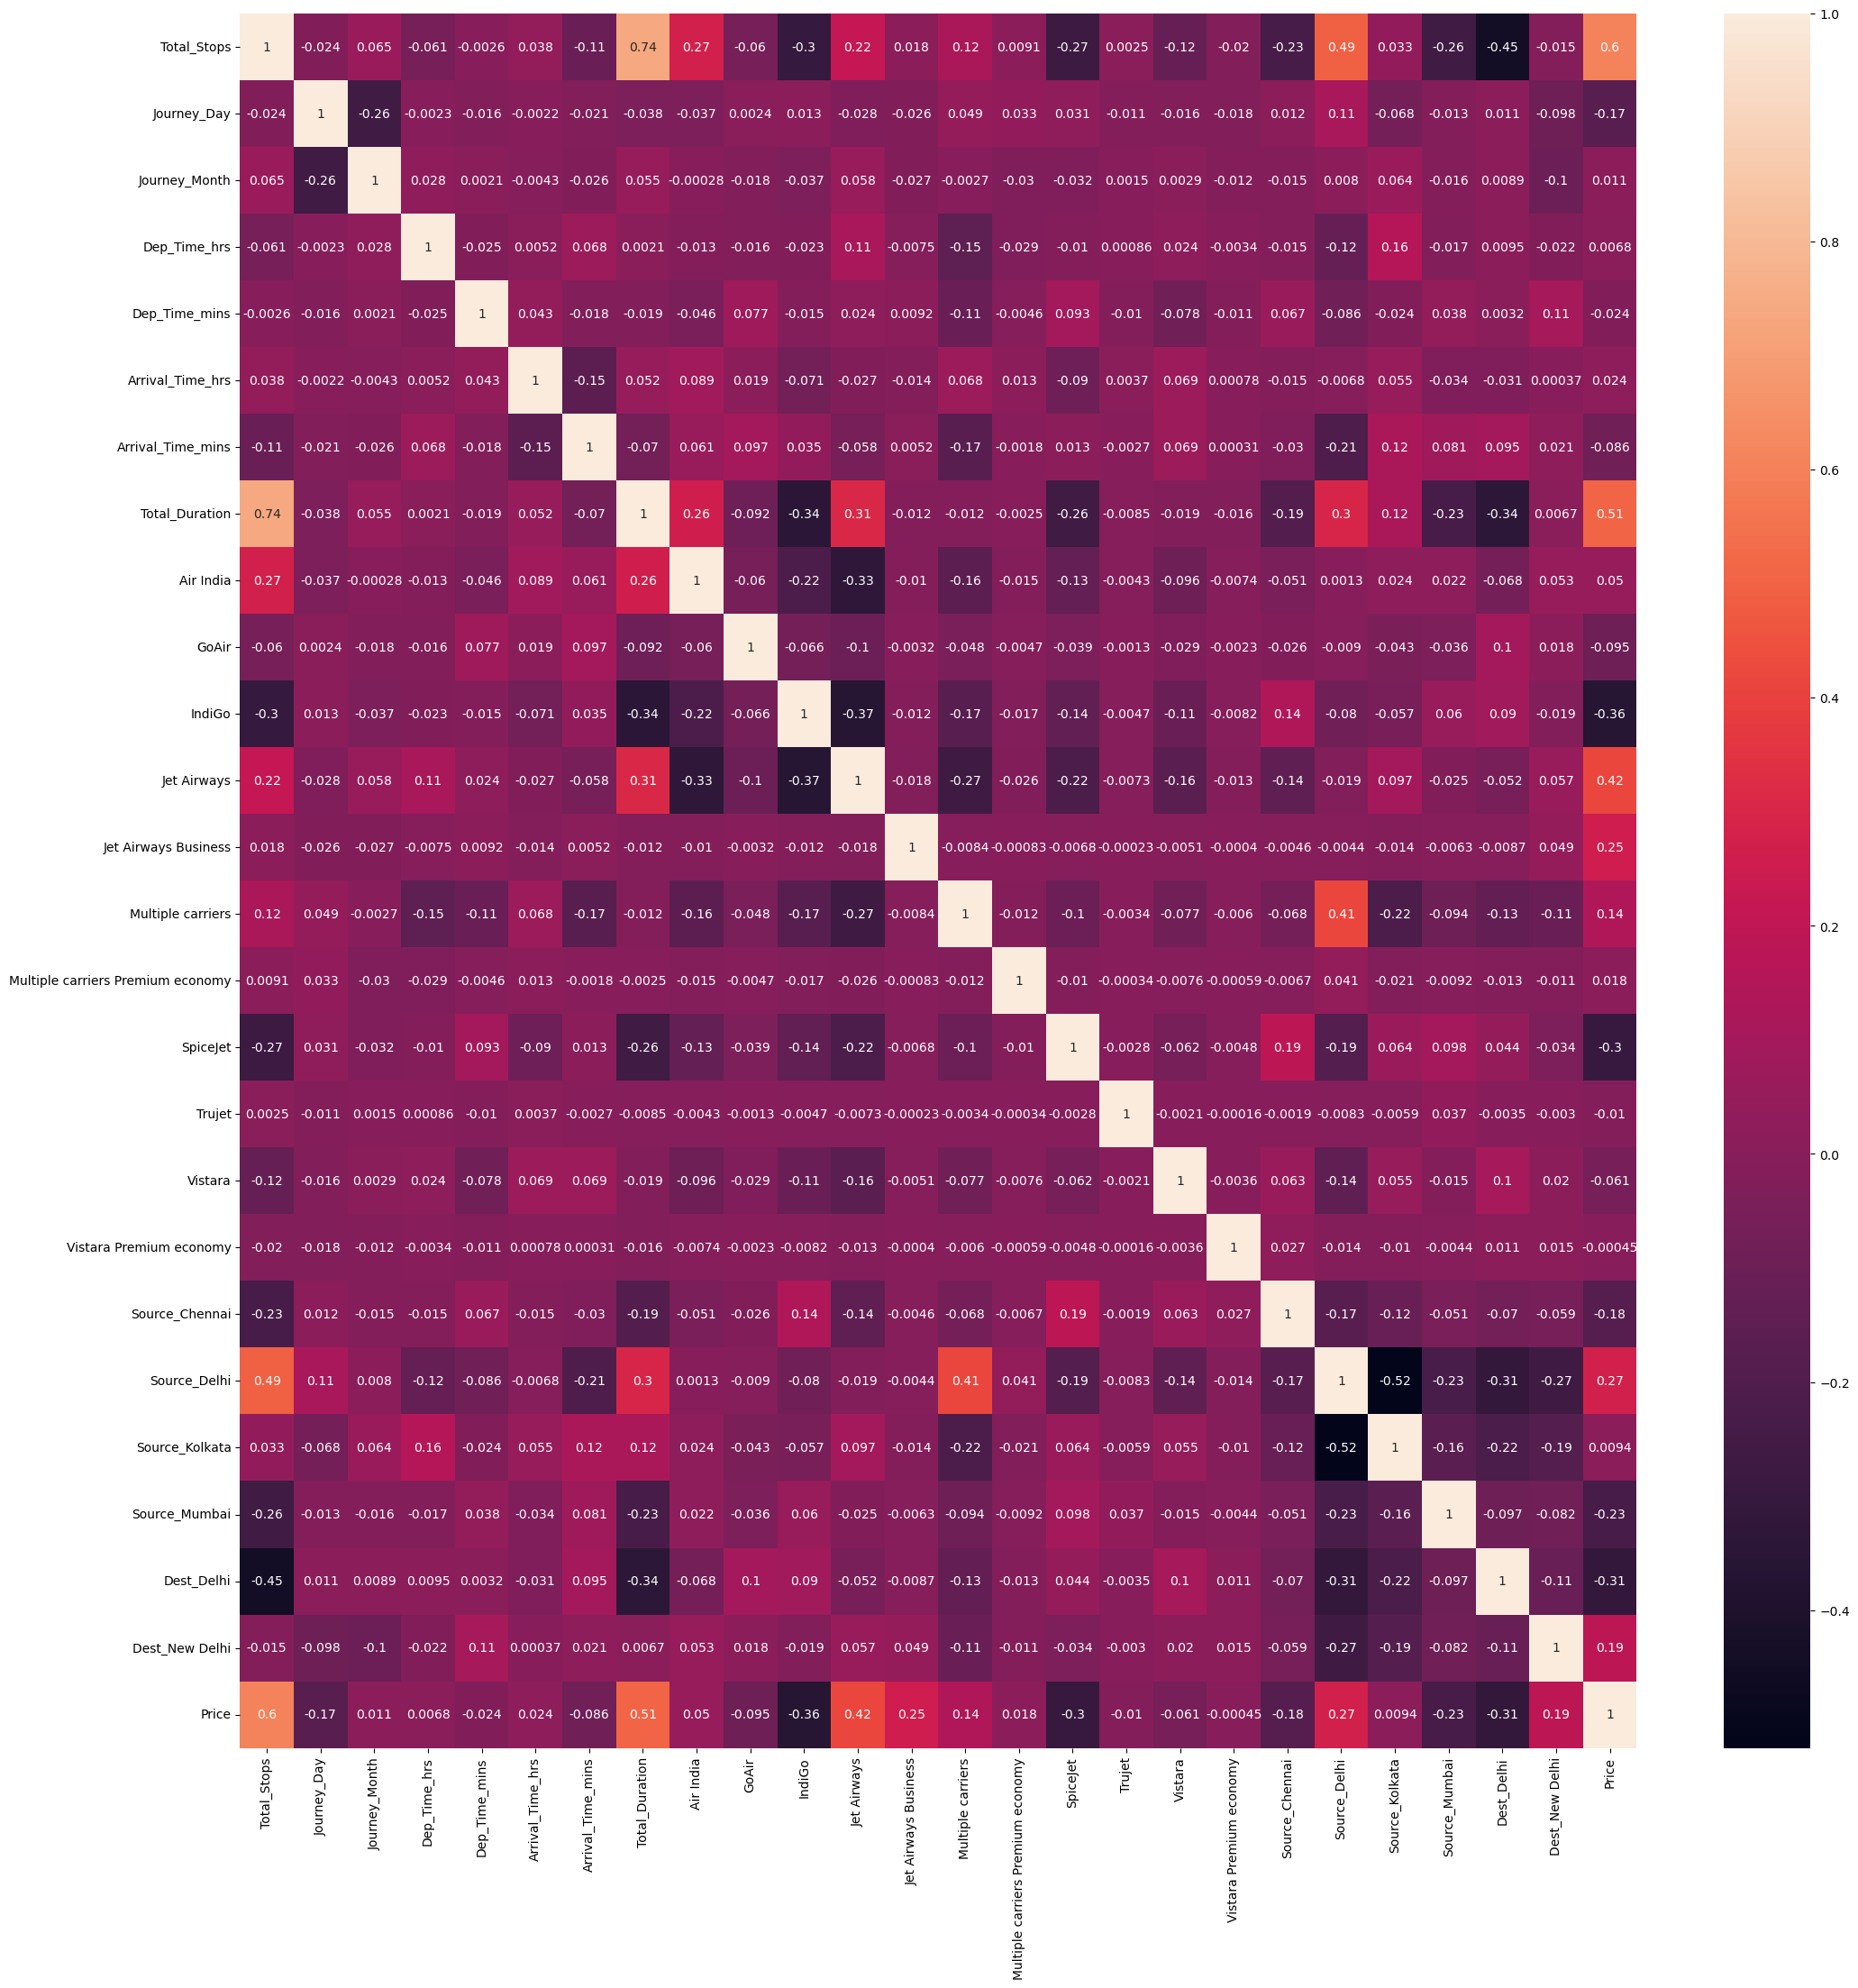

In [159]:
plt.figure(figsize=(25,25))
sns.heatmap(df_new.corr(),annot=True)

In [160]:
from sklearn.ensemble import ExtraTreesRegressor
selection = ExtraTreesRegressor()
selection.fit(X,y)

ExtraTreesRegressor()

In [161]:
print(selection.feature_importances_)

[2.48087302e-01 1.08024893e-01 8.51111287e-02 2.74105420e-02
 2.62818031e-02 3.09891276e-02 2.40230774e-02 1.20899850e-01
 8.99749922e-03 2.16073307e-03 1.81605140e-02 1.34423317e-01
 6.66197735e-02 1.70762590e-02 9.20367997e-04 3.88414047e-03
 8.69245075e-05 5.04262725e-03 1.09695620e-04 5.34242584e-04
 5.73853579e-03 4.57487716e-03 6.28113901e-03 1.34566020e-02
 1.23783467e-02 5.30392059e-03 4.66661511e-04 2.29561003e-02]


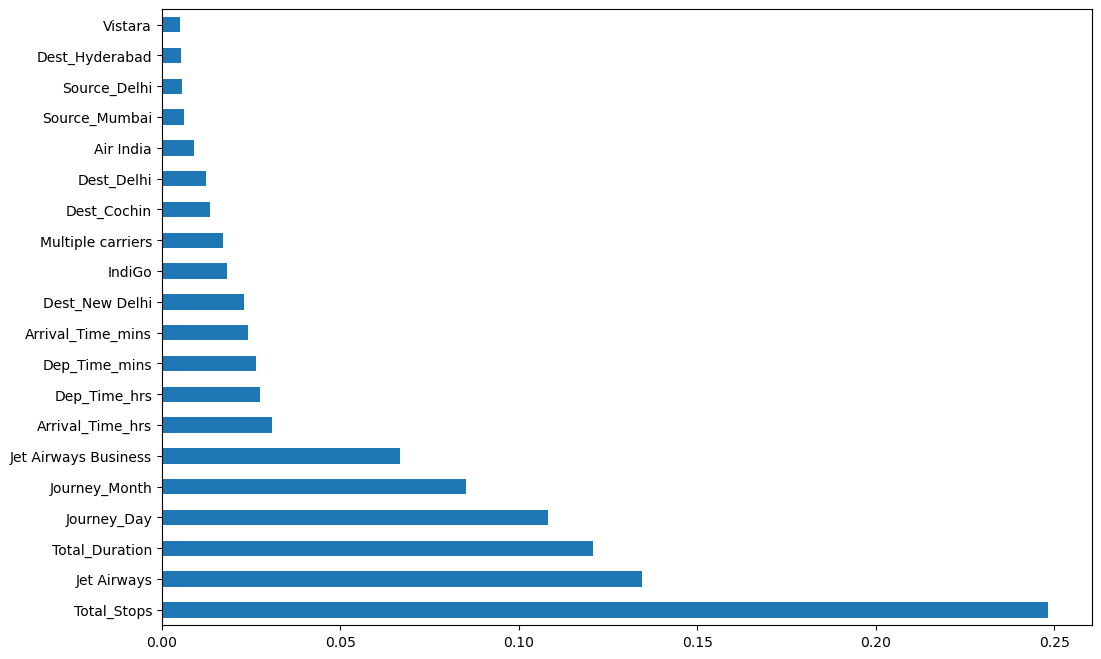

In [162]:
plt.figure(figsize=(12,8))
feat_importances = pd.Series(selection.feature_importances_,index=X.columns)
feat_importances.nlargest(20).plot(kind='barh')
plt.show()

## Random Forest

In [ ]:
## We had detected outliers so used Random Forst which is less sensitive to outliers

In [163]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [164]:
from sklearn.ensemble import RandomForestRegressor
reg_rf = RandomForestRegressor()
reg_rf.fit(X_train,y_train)

RandomForestRegressor()

In [165]:
y_pred = reg_rf.predict(X_test)
y_pred

array([16696.92      ,  6180.75      ,  8847.46      , ...,
        6791.92      , 12938.5675    , 12710.93783333])

In [166]:
reg_rf.score(X_train,y_train)

0.9517481714297674

In [167]:
reg_rf.score(X_test,y_test)

0.8102159995387508

/var/folders/yy/690rwhcs4x79h0xj3sdj20yr0000gn/T/ipykernel_1244/1450567611.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_test-y_pred)


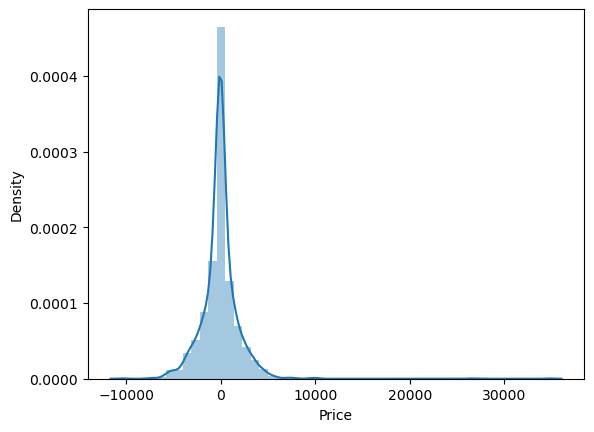

In [168]:
## residual plot or error plot, comparision the distribution between residuals of the predicted values and target values
## one of the assumptions particularly in linear regression is that the residuals are normally distributed.
##Residual plots can reveal patterns or trends in the errors.
sns.distplot(y_test-y_pred)
plt.show()

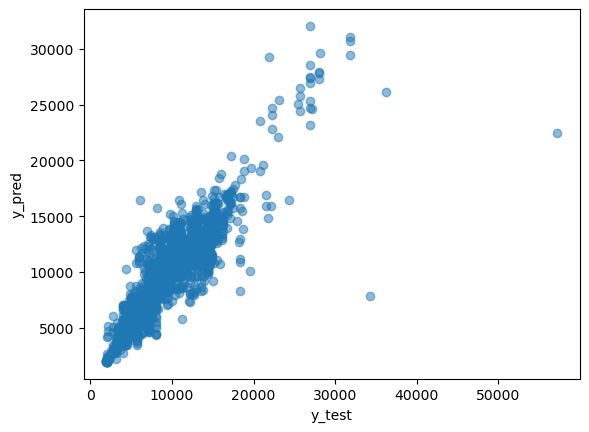

In [169]:
##Visualization with Scatterplots show us how well model performs in terms of the predicted values align with the actual values
plt.scatter(y_test,y_pred,alpha=0.5)
plt.xlabel("y_test")
plt.ylabel("y_pred")
plt.show()

In [170]:
## The average absolute err (MAE) differences between the actual (y_test) and predicted (y_pred) values
## The average of the squared differences between the actual and predicted values. MSE penalizes larger errors more than smaller ones and is sensitive to outliers
## The average magnitude of errors in the same units as the target variable. Like MAE, smaller RMSE values indicate better model performance
from sklearn import metrics
print('MAE:',metrics.mean_absolute_error(y_test,y_pred))
print('MSE:',metrics.mean_squared_error(y_test,y_pred))
print('RMSE:',np.sqrt(metrics.mean_absolute_error(y_test,y_pred)))

MAE: 1196.0784420007278
MSE: 4092133.307370202
RMSE: 34.58436701749402


In [171]:
## It s a measure of how well the predicted values match the actual values
## R2=1 perfect model, R2=0 The model provides no better predictions than the mean of the target variable. R2<0 model is worse
metrics.r2_score(y_test,y_pred)

0.8102159995387508

## SVR
Less sensitive to outliers

In [172]:
from sklearn.svm import SVR
model = SVR(kernel='rbf')
model.fit(X_train, y_train)

SVR()

In [173]:
y_pred = model.predict(X_test)
y_pred

array([8429.40080121, 8159.59903323, 8855.37013049, ..., 9133.58329081,
       9438.34608609, 7722.01767983])

In [174]:
print('MAE:',metrics.mean_absolute_error(y_test,y_pred))
print('MSE:',metrics.mean_squared_error(y_test,y_pred))
print('RMSE:',np.sqrt(metrics.mean_absolute_error(y_test,y_pred)))

MAE: 3082.3191204692534
MSE: 18210299.777740516
RMSE: 55.518637595579136


In [175]:
from sklearn.metrics import r2_score

r_squared = r2_score(y_test, y_pred)
r_squared

0.1554469803821723

/var/folders/yy/690rwhcs4x79h0xj3sdj20yr0000gn/T/ipykernel_1244/3453123835.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_test-y_pred)


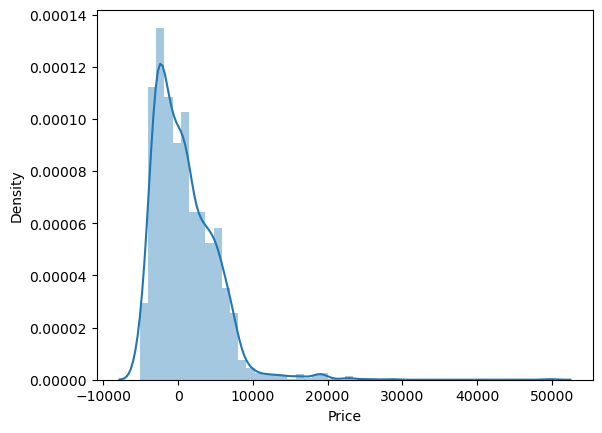

In [176]:
sns.distplot(y_test-y_pred)
plt.show()

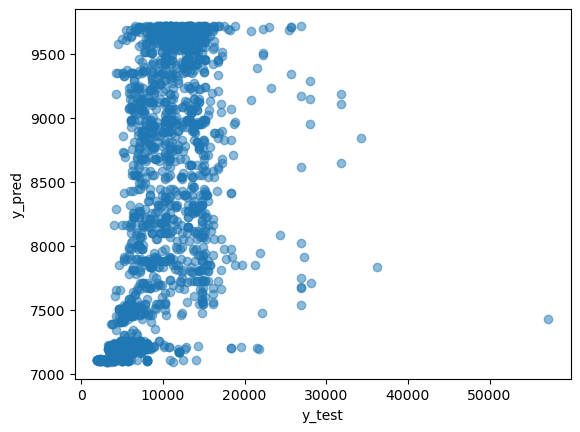

In [177]:
plt.scatter(y_test,y_pred,alpha=0.5)
plt.xlabel("y_test")
plt.ylabel("y_pred")
plt.show()

# XGBoost

In [178]:
from xgboost import XGBRegressor
model = XGBRegressor()
model.fit(X_train, y_train)


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [179]:
from sklearn.metrics import r2_score
y_pred = model.predict(X_test)
y_pred

array([17090.61  ,  6400.1978,  8351.589 , ...,  6883.0425, 12352.096 ,
       12586.139 ], dtype=float32)

In [180]:
r_squared = r2_score(y_test, y_pred)
r_squared

0.8531251584230667

In [181]:
print('MAE:',metrics.mean_absolute_error(y_test,y_pred))
print('MSE:',metrics.mean_squared_error(y_test,y_pred))
print('RMSE:',np.sqrt(metrics.mean_absolute_error(y_test,y_pred)))

MAE: 1148.06034820371
MSE: 3166923.606684175
RMSE: 33.883039240949294


/var/folders/yy/690rwhcs4x79h0xj3sdj20yr0000gn/T/ipykernel_1244/3453123835.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_test-y_pred)


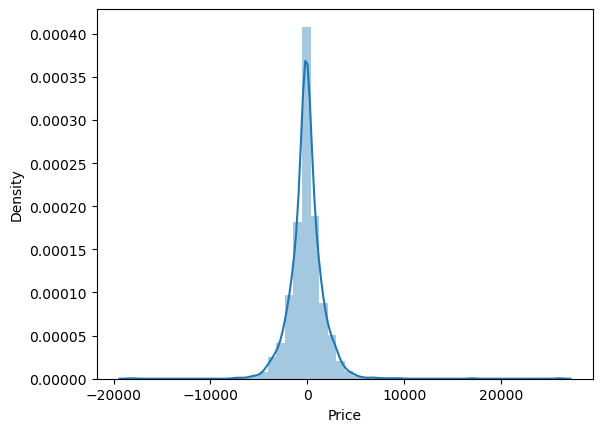

In [182]:
sns.distplot(y_test-y_pred)
plt.show()

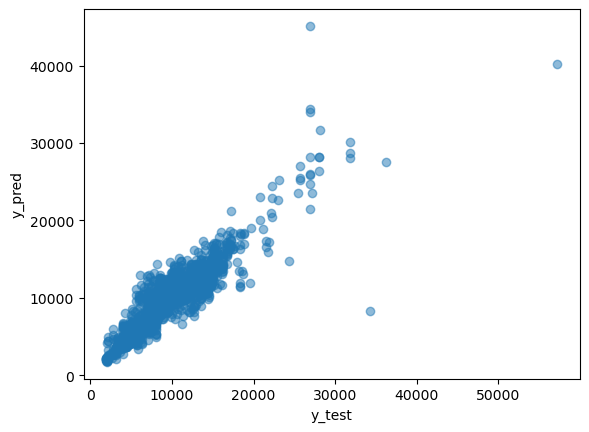

In [183]:
plt.scatter(y_test,y_pred,alpha=0.5)
plt.xlabel("y_test")
plt.ylabel("y_pred")
plt.show()

# Report 

## Phase 1
In the initial phase, the dataset (10,683 rows, 11 columns) revealed two missing values in the 'Route' column, addressed by removing instances. All features were initially object types, requiring one-hot encoding for categorical features, except 'Total_stops,' treated with Label Encoder. 'Additional_Info' and 'Route' were dropped due to lack of information and numerous None values.

Visualization with count plots showcased the distribution of key categorical features ('Airline,' 'Source,' 'Destination'). Statistical analysis using z-scores identified potential outliers, providing insights into data distribution without immediate removal.

This phase sets the stage for subsequent model development and evaluation.

## Phase 2

In the second phase, the target variable 'Price' was moved to the last column, and the cleaned dataset was saved as 'df_final' in CSV format. Feature selection involved splitting the dataset into 'X' (predictors) and 'y' (target variable). A heatmap identified features with a perfect positive relationship (correlation of 1), and a threshold of >0.8 was set to avoid redundancy.

To further refine feature selection, ExtraTreesRegressor was employed to rank the importance of features, with 'Total_stops' emerging as the highest-ranked predictor.

## Phase 3
In the modeling phase, algorithms less sensitive to outliers, namely Random Forest, SVR, and XGBoost, were chosen. 

Model Accuracy for Random Forest:
Training Set Accuracy: 95.25%
Testing Set Accuracy: 81.38%
The Random Forest model demonstrates a strong performance on the training set, with a high R-squared value indicating good predictive capability. The testing set also exhibits a respectable accuracy of 81.38%.

Model Accuracy for SVR:
Mean Absolute Error (MAE): 3082.32
Mean Squared Error (MSE): 18210299.78
Root Mean Squared Error (RMSE): 55.52
R-squared (R²): 0.16

High MAE and RMSE values suggest that the model's predictions may deviate significantly from the actual ticket prices. The MSE indicates the average squared difference between predicted and actual values, emphasizing larger errors in prediction.The R-squared value of 0.16 indicates that the SVR model explains only a small proportion of the variance in the target variable. This modest R-squared value suggests that the model may not capture the underlying patterns in the data effectively.


Model Accuracy for XGBOOST:
Mean Absolute Error (MAE): 1148.06
Mean Squared Error (MSE): 3166923.61
Root Mean Squared Error (RMSE): 33.88
R-squared (R²): 0.85
The XGBoost model demonstrates strong predictive performance for flight ticket prices. The relatively low MAE and RMSE values suggest that the model's predictions are close to the actual ticket prices. The MSE indicates the average squared difference between predicted and actual values, with a smaller value indicating overall accuracy.
The high R-squared value of 0.85 indicates that the XGBoost model explains a substantial proportion of the variance in the target variable. This suggests that the model captures underlying patterns in the data effectively.





## Conclusion
Among the three models, XGBoost Regression consistently outperforms Random Forest and SVR in terms of key performance metrics.
XGBoost exhibits the lowest MAE, MSE, and RMSE, indicating superior accuracy and precision.
The R-squared value for XGBoost (0.85) is substantially higher, indicating a better ability to explain variance in the target variable.
